# **Explainer Notebook**
By Jesper Lund, 214639 and Frederik Bæk, s214618  
<br>
<font color="firebrick1"> This notebook serves as the backbone of all the code and analysis performed in this project. Both group members have contributed equally to the project. AI tools such as chatGPT and Copilot have occasionally been used to understand or help with especially complex code.  </font>

# 1. Motivation

We wish to investigate, how rain may affect the average tips received by yellow taxi drivers, but also use the text from wikipedia to explain, why some places are more attractive than others in New York City. In this project, we have 3 data sets: TLC trip record data, weather data in New York City scraped from "wunderground", and text scraped from Wikipedia. Details on the data will be explained below:

TLC trip record data is yellow and green taxi trip records on fields including: tip, pick-up location/time and drop-off location/time. The data is accessible from the following link: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page and you are able to download yellow and green taxi trip records for a given month between 2009 and 2024. The data downloaded from the website is in a format called Parquet, which can be imported into a panda dataframe easily. The locations are seperated into taxi zones, and the information regarding these can be downloaded from the same website. 

We chose to scrape the weather data from wunderground, because the website keeps weather history data, you can choose specific weather stations in New York City and finally, it was relatively easy to scrape due to the format of the url. This website uses JavaScript, so BeautifulSoup did not suffice and we resolved to another method using Selenium to scrape. The data we scraped came in tables, where the precipitation, wind, temperature and other weather relevant fields were recorded hourly from 1930 to 2024. There are many weather stations in New York City, so we resolved to using the default weather station with initials KLGA. The website has the following link: https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/, where the data needs to be inputted after date/. 

To get a deeper insight into, why people take taxi trips from one location to another, we categorized the pick-up and drop-off locations based on the borough the taxi zones are in. Based on the 5 boroughs in New York City: Manhattan, Bronx, Staten Island, Brooklyn and Queens, we scraped their respective wikipedia page and also wikipedia pages of locations of interest (that ware on the boroughs' pages) to retrieve as much information as possible. 

Based on some simple google search, the month of May is the month with the most inconsistency in the weather, that is 9 days on average are rainy and the remaining are not. We chose to look at the 10 previous years in the month of May, and found that May 5th in 2017 and 2013 have the greatest difference in precipitation. These 2 days are the ones we will be focussing on in this report.

The intended goal for the end user's experience is to get an insight on what may influence people to tip taxi drivers. As a taxi driver, it may suggests where you should go when it rains and when it does not rain. Furthermore, it may also suggest which routes you should not take to maximize tips received. For policy makers, it may suggest boroughs, where public transportation availability may need to be improved. 


# 2. Basic Stats

When creating the network and adding edges, it is important to count the sum of the tips recorded between two taxi zones and average them based on the amount of trips. The reason for this is that the amount of trips recorded in 2013 vs 2017 on May 5th is not the same, so it is not comparable. Furthermore, the tips needs to be adjusted for inflation, in this project we made the tips in 2013 adjusted to inflation to 2017 (by 5%). In general, dictionaries have been used frequently to keep everything in a orderly matter so it is easy to work with, which is crucial since there are so much data that needs to be handled. 

After having scraped the wikipedia text, we had to apply some Natural Language Processing techniques to clean up the data before we could begin to analyse it. This consisted of removing punctuation and stopwords, and afterwards performing tokenization, which is the act of breaking a text into individual words or tokens, as well as lemmatization, reducing words to their base or dictionary form to normalize variations of words and improve analysis accuracy. We decided to manually remove certain stopwords, primarily proper names, as these would dominate the text for each borough.
  
The Taxi data was stored in parquet files, that we downloaded and then importet into a Pandas Dataframe in Python. Initially, we downloaded trip data from the last 10. Since each seperate dataframe had the same naming for the columns, we renamed the columns to include the year for each dataframe and then concatenated them into one dataframe with all years. The next step was to do some pre-processing on the data. Due to the sheer size of the dataset, with several million rows of data, we decided to only use a subpart of the total dataset to make computational tasks feasible. 

The taxi data from May 5th 2013 consists of roughly 490k trip records, whilst the taxi data from May 5th 2017 consists of roughly 363k trip records. 

The weather data is saved in a file called "transformed_data.json". It is a dictionary containing the years from 2013 to 2023, and each year contains the days in May 1-31, and each day has all recorded data on the given day. The amount of time stamps taken varies from day to day, but in total 9963 weather time stamps were taken between 2013 and 2023. Since we are limited to May 5th in 2013 and 2017, we will only use 84 of these weather time stamps. 

The following is the amount of words scraped from Wikipedia about the respective borough:
<br>
Bronx: 65493 
<br>
Brooklyn: 108013 
<br>
Manhattan: 191659 
<br>
Queens: 73886 
<br>
Staten Island: 43905 
<br>

# 3. Tools, theory and analysis

When working with the text, the first step was to scrape the text from Wikipedia pages related to different boroughs of New York City, which we stored in a dictionary named "urls". We then sent a get-request for each URL, parsing the HTML using BeautifulSoup to extract all paragraph elements, and concatenateing the content into a large string for each borough. We then cleaned the text using a function that converts everything to lowercase, removes punctuation and stop words, which are common words that don't carry much meaning. We also added some custom stop words, primarily proper names related to each borough, as these would have dominated the wordclouds and hidden the other features. The function also tokenizes the text, meaning splitting it into individual words, and lemmatizes the words, converting each word to its base or dictionary form using the NLTK library. Finally, a word cloud for each borough is generated using the WordCloud library. This process allows us to analyze and present information about the different boroughs of New York City based on the text of their associated Wikipedia pages.  
After inspecting the wordclouds it became evident what categorized each borough. The wordcloud for Manhatten was dominated with words like "building", "street", and "museum", while the most dominent features in the wordcloud for Queens were "bridge", "terminal", and "airport", and for Staten Island "ferry", and "bridge". These results aligned quite well with our expectations, since Manhatten is known for its assortment of streets and skyscrapers, Queens is home to the huge JFK Airport, and Staten Island is only accessible by bridge and ferry.

Due to the apparent similarity the two networks created have visually, it is evident that structural analysis is required to further explain this spatial network. Furthermore, there sheer amount of edges make it impossible to interfere anything with certainty based on the visual representation of the network.  
The network density provides insights about the connectivity of a network. It is calculated by computing the ratio between maximum amount of links and the actual links of a network. The maximum amount of links in our networks are calculated by ((n+1) *n)/2, where n is 257, the amount of taxi zones. This measurement is vital for this project, as the flow of taxi trips may differ due to weather and it could explain the network flow. The network density for May 5th 2013 was computed to be 0.29, whereas the network density for May 5th 2017 was computed to be 0.24. This suggests that there was more connectivity for the day with no rain.  
To further investigate if the weather affects connectivity, both networks were checked to see, whether or not they were fully connected. If one of the networks were not connected fully, then the weather may could have helped explain it. Since both networks are fully connected, the largest component of either network is equal to the network itself. This also suggests that both networks exhibit the small-world phenomenon.  
We are interested in the tips received my taxi drivers, whether or not it is affected by the weather. One aspect that may affect this is the averaged weighted shortest path in the two networks. This was computed to be 0.23 and 0.41 for the network in year 2013 and 2017 respectively. The 78% greater value for 2017 suggests that the trips during rainy days had larger tips.  
The assortativity for the networks is important to analyze, since the similarity of nodes in the network may explain the underlying structure of the network. In this report the attribute assortativity and the degree assortativity is investigated. In this setting, the attribute of interest are the boroughs. The attribute and degree assortativity for 2013 was 0.03 and -0.35 , and for 2017 was 0.03 and -0.36 respectively. The values are roughly the same, suggesting that the networks' nodes behave similarily regardless of weather. The value of 0.03 for both networks suggests that there is virtually no tendency for people to transport within their borough. This does make somewhat sense, if we look back at the wordclouds, where we saw some of the most prominent features for each borough. It seems likely that people from all over the five boroughs have to get to and from the airport in Queens fx, or visiting downtown Manhatten or the Zoo in Bronx. The degree assortativity coefficient of -0.35 and -0.36 indicates that high degree nodes tend to connect with low degrees nodes, but not to a great extent. This makes sense, as tourists are likely to visit similar places and transport between them, thus nodes of high interest will have high node degrees.  
Finally the communities were analyzed to provide some insights into how external factors such as the weather affects, what communites are formed based on tipping patterns and frequencies. In the network representing 2013, a total of 10 communites were formed, in which 6 of them only contained one node. The modularity of this network was computed to be 0.12, suggesting a weak community structure. In the network representing 2017, a total of 8 communities were formed, in which 4 contain one node and 1 community contains 3 nodes. This network has a modularity of 0.16, which is roughly 30% more than the network in 2013, suggesting that the communities in 2017 have a better community structure and internal connectivity.  

In Figure 1 in the Code section below, we see the degree distribution of the two networks. Both distrubutions are skewed to the left, and they both appear to be multimodal since they have multiple peaks. The plot shows that the tendency for both networks is that the frequency of nodes fall with a higher degree, with the highest frequency of nodes in the interval of 0 and 50 degreees. The two networks generally seem to follow a similar distribution, but with some differences in the frequency of the degree interval.  
In Figure 2, we see the cumulative degree distribution for both networks plottet against the average degrees for both years. We see that both the average and the cumulative degreee distribution is higher in 2013, suggesting that the taxi locations in general had a higher "connectivity" with other taxi zones in 2013.  
In Figure 3 and 4 we see the cumulative average tip for each unique route. Initially the plots look very similar, but upon further inspection it is evident that there is in fact a change: in 2013, 73% of routes had tips (meaning non-zero tip values) while in 2017 that numbern had increased to 80%. (See the code section for the calculations). With more routes having non-zero tips in 2017, it seems likely that the total average of tips would be higher as well. We investigated this by calculating the total tip amount average for all the routes on the 5th of may 2013 and 2017. The result was that the average tip amount was $1.30 in 2013 and $1.89 in 2017 - a 45% increase!

# 4. Discussion

The amount of data available was more than sufficient to be able to do a comprehensive data analysis using various network metrics to analyze the taxi networks with different average rainfall. This is partly due to the sheer amount of pre-processing and data handling. Given the findings explained previously, the weather does appear to have a measurable impact on the dynamics of taxi trips and tipping behaviors. However, there are things that the project lacks that will be covered now.  
The biggest let down of our creation is the lack of investigating several days for several years. This would give a better and a bigger picture, and would likely reduce the effect of confounders and outlier days, which would be days that do not represent the norm in terms of tipping. However, this would have required a lot more time and analysis and did not seem feasible, hence we resolved to comparing the 2 most different days in terms of precipitation in the month of May between 2013 and 2023. We also compared 2 days that are not the same weekday: May 5th 2013 was a Sunday and May 5th 2017 was a Friday. This might have influenced the outcome to a great extent, which is why more days and years would have to be investigated. It would also have been interesting to see, whether or not this trend, that is rain affecting tipping behavior, applies to other cities in the US or else where. It is possible that the amount of tourists in New York City may be affecting the tipping for various reasons, e.g. difference in culture.  
The weather and the taxi data are both time series data. The weather data is however recorded roughly at an hourly rate, since the amount of recorded data varies from day to day. The taxi data has a pick-up time and a drop-off time. Somehow creating networks based on time would possibly show a more realistic representation of the taxi flow in New York City. Furthermore, the weather changes throughout the day, hence it may be rainy some part of the day and dry the rest.We only consider the average precipitation in this project. We chose the KLGA airport by default, but to have more accurate results it would have been better to scrape data for a weather station closest to each taxi zone. This was looked into, but it would have been very comprehensive since the network itself represnts a day with a pre-defined weather condition, e.g. the network for May 5th 2013 had no precipitation on average. Furthermore, it might have provided a deeper insight if the wind, temperature and other weather variables were considered since precipitation is not the only factor that may influence one's tipping generosity.  
Had we had the time, it could also have been interesting to look at other features from the Taxi dataset, such as trends in the average trip length, or changes in the number of passengers during Covid-19 fx - the applications of these datasets are huge!. Ideally, we wanted to use data from Twitter (or X) for our text analysis, as we felt this would have been more useful than Wikipedia, but they no longer had a free API.

To answer our inital research question: does rain have an effect on tip amount in NYC taxis? It seems like the answer would be a clear "yes!", with a 45% increase in average tip amount in 2017, which was the year with the most rain. However, it is important to bear in mind, that this result is not a statistical proof that rain equals more tips. Even though there indeed seems to be a correlation between the amount of rain and the amount tipped, this correlation does not necessarily imply causation - meaning we cannot be sure that the rain is the cause of the higher average tip. There are tons of possible confounders in this study, such as the 5th of may being two different days of the week, that the rainfall was just an average of the entire day, that we only looked at a single day from two years, and possible many more hidden confounders. 

_________________________________________________________________________________________________________________________________________________________

# Code  
Below is all the code that has been relevant for working with this project. 

In [55]:
#Imports
import wordcloud
import nltk
import requests
import math
import csv
import ast
import pickle
import string
import json
import warnings
import community.community_louvain
import networkx as nx
import numpy as np
import pandas as pd
import netwulf as nw
import matplotlib.pyplot as plt
import netwulf as nw
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from itertools import combinations
from bs4 import BeautifulSoup  
from collections import Counter
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

### Taxi Data:

In [3]:
##################################################  This cell takes about 2.5 minutes to run ##################################################

# Read in the Taxi trip data for May from 2013 to 2023
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# This is hardcoded to be read from my local machine since the sample data is too large to be uploaded to GitHub
# If you want to run the code, you need to download the data from https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page 
# and change the path to the location of the data on your machine
df_2023 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2023-05.parquet")
df_2022 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2022-05.parquet")
df_2021 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2021-05.parquet")
df_2020 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2020-05.parquet")
df_2019 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2019-05.parquet")
df_2018 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2018-05.parquet")
df_2017 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2017-05.parquet")
df_2016 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2016-05.parquet")
df_2015 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2015-05.parquet")
df_2014 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2014-05.parquet")
df_2013 = pd.read_parquet("/Users/jesperberglund/Desktop/TaxiDataMay/yellow_tripdata_2013-05.parquet")

# Rename columns to include year for each dataframe and concatenate them into one dataframe with all years
dataframes = [df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013]
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013]
for df, year in zip(dataframes, years):
    df.columns = [f'{col}{year}' for col in df.columns]
df_total = pd.concat(dataframes, axis=1)
print("Visualizing the contents of the dataset: \n", df_total.columns)

# Export a random sample of 100,000 rows to a csv file to reduce the size of the dataset
columns_to_export = [f'{col}{year}' for year in years for col in ['tip_amount', 'tpep_pickup_datetime', 'PULocationID', 'DOLocationID']]

# The length of the "shortest" column is 2507109 which is why we use this number as the upper limit for the random indices
random_indices = np.sort(np.random.choice(2507109, size=100_000, replace=False))
df_total[columns_to_export].iloc[random_indices].to_csv('df_tip.csv')

# Dataframes for working with the specific date 5th of May for 2013 and 2017
df_5th_may_2013 = df_2013[['tip_amount2013', 'PULocationID2013', 'DOLocationID2013', 'tpep_pickup_datetime2013']]
df_5th_may_2017 = df_2017[['tip_amount2017','PULocationID2017', 'DOLocationID2017', 'tpep_pickup_datetime2017']]

# Converts 'tpep_pickup_datetime' columns to datetime
df_5th_may_2013['tpep_pickup_datetime2013'] = pd.to_datetime(df_5th_may_2013['tpep_pickup_datetime2013'])
df_5th_may_2017['tpep_pickup_datetime2017'] = pd.to_datetime(df_5th_may_2017['tpep_pickup_datetime2017'])

# Filters rows where day is 5 for both 2013 and 2017
df_5th_may_2013 = df_5th_may_2013[((df_5th_may_2013['tpep_pickup_datetime2013'].dt.day == 5))]
df_5th_may_2017 = df_5th_may_2017[((df_5th_may_2017['tpep_pickup_datetime2017'].dt.day == 5))]

# Export to csv
df_5th_may_2013.to_csv('df_5th_may_2013.csv')
df_5th_may_2017.to_csv('df_5th_may_2017.csv')

Visualizing the dataset: 
 Index(['VendorID2023', 'tpep_pickup_datetime2023', 'tpep_dropoff_datetime2023',
       'passenger_count2023', 'trip_distance2023', 'RatecodeID2023',
       'store_and_fwd_flag2023', 'PULocationID2023', 'DOLocationID2023',
       'payment_type2023',
       ...
       'payment_type2013', 'fare_amount2013', 'extra2013', 'mta_tax2013',
       'tip_amount2013', 'tolls_amount2013', 'improvement_surcharge2013',
       'total_amount2013', 'congestion_surcharge2013', 'airport_fee2013'],
      dtype='object', length=209)


In [113]:
print("Average tip amount for 5th of May 2013: {:.2f}".format(df_5th_may_2013['tip_amount2013'].mean()))
print("Average tip amount for 5th of May 2017: {:.2f}".format(df_5th_may_2017['tip_amount2017'].mean()))

Average tip amount for 5th of May 2013: 1.30
Average tip amount for 5th of May 2017: 1.89


In [56]:
def create_unique_pairs(pairs): #Method that sums the tips for a trip whilst also counting the occuruences of the same trip
    route_dict = {}
    for tip, locations in pairs:
        sorted_locations = tuple((locations))
        if sorted_locations in route_dict:
            route_dict[sorted_locations][0] += tip 
            route_dict[sorted_locations][1] += 1   
        else:
            route_dict[sorted_locations] = [tip, 1] 
    unique_route_list = [[list(locations), sum_tip_count[0], sum_tip_count[1]] for locations, sum_tip_count in route_dict.items()]
    return unique_route_list

def load_taxi_data(file_path): #Method that loads the taxi data and applies inflation to 2013.
    inflation = 1
    if(file_path == "df_5th_may_2013.csv"):
        inflation = 1.05
    pairs = []
    df = pd.read_csv(file_path)
    for row in df.iterrows():
        location = [row[1][2],row[1][3]]
        location.sort()
        pairs.append([row[1][1]*inflation,location])
    return pairs

In [57]:
#This code creates a look-up dictionary, where you input a taxi zone and you will get the borough returned.
borough = {}
with open('taxi_zone_lookup.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        borough[row[0]] = row[1]

In [98]:
#Graphs for 2013 and 2017
G_2013 = nx.Graph()
G_2017 = nx.Graph()
data = [] #This list will contain a list corresponding to a year containing locations and average tips

panda_file_paths = ["df_5th_may_2013.csv","df_5th_may_2017.csv"] #Paths to the taxi data

#This code iterates over the chosen paths to taxi data
for path in panda_file_paths:
    all_pairs = (load_taxi_data(path))
    unique_pairs = create_unique_pairs(all_pairs)
    unique_pairs.sort(key=lambda x: x[1])
    data.append(unique_pairs)

def createGraph(data, G): #This method creates a graph and also categorizes nodes (locations) into their respective boroughs
    for pair in data:
        G.add_edge(pair[0][0],pair[0][1],weight=pair[1])

    for node in G.nodes():
        color = "gray" #Taxi zones that are not part of New York City's boroughs are still included, e.g. 264 (outside NYC) and 265 (unknown). We simply make them gray.

        #regions dictionary is used to figure out, which borough the node belongs to
        if(borough[str(node)] == "Manhattan"):
            color = "yellow"
        if(borough[str(node)]  == "Queens"):
            color = "purple"
        if(borough[str(node)]  == "Bronx"):
            color = "green"    
        if(borough[str(node)]  == "Staten Island"):
            color = "red"
        if(borough[str(node)]  == "Brooklyn"):
            color = "blue" 
        node_attributes = {"group" : color}
        G.nodes[node].update(node_attributes) #Attributes for a given node is updated

In [99]:
#Graphs are created for 2013 and 2017
createGraph(data[0],G_2013)
createGraph(data[1],G_2017)

print("Number of nodes in the 2013 network:", G_2013.number_of_nodes())
print("Number of edges in the 2013 network:", G_2013.number_of_edges())
print("Number of nodes in the 2017 network:", G_2017.number_of_nodes())
print("Number of egdes in the 2017 network:", G_2017.number_of_edges())

#Total maximum possibly links:
total_links = ((257+1)*257)/2

#2013:
print("2013 network density:", 9757/total_links)

#2017:
print("2017 network density", 7914/total_links)

#Largest connected components
print(len(max(nx.connected_components(G_2013))))
print(len(max(nx.connected_components(G_2017))))

#Average shortest path length
print(nx.average_shortest_path_length(G_2013))
print(nx.average_shortest_path_length(G_2017))

Number of nodes in the 2013 network: 257
Number of edges in the 2013 network: 9757
Number of nodes in the 2017 network: 257
Number of egdes in the 2017 network: 7914
2013 network density: 0.29430217476548126
2017 network density 0.23871142882997015
257
257
1.7284168287937742
1.7866913910505837


In [100]:
with open('network_config.json', 'r') as f: #Pre-defined network_config we created
    loaded_config = json.load(f)
stylized_network, config = nw.visualize(G_2013, config=loaded_config)
stylized_network, config = nw.visualize(G_2017, config=loaded_config)

Average degree 2013: 37.96498054474708
Average degree 2017; 30.79377431906615


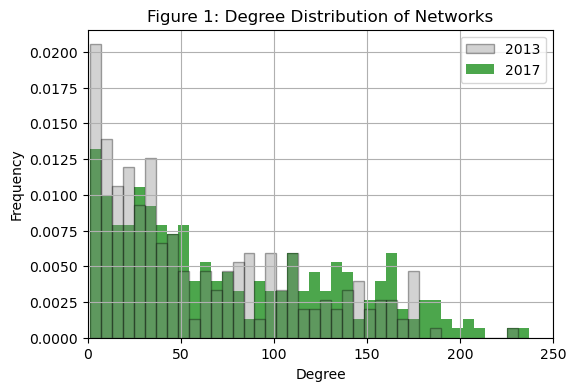

In [114]:
print("Average degree 2013:", 9757/257)
print("Average degree 2017;", 7914/257)
degree_dist_2013 = [degree for node, degree in G_2013.degree()]
degree_dist_2017 = [degree for node, degree in G_2017.degree()]

hist, bins = np.histogram(degree_dist_2013, bins=40, density=False)

# Plotting the degree distribution for the two networks
plt.figure(figsize=(6, 4))
plt.hist(degree_dist_2013, bins=bins, density=True, alpha=0.7, color = "green")
plt.hist(degree_dist_2017, bins=bins, density=True, alpha=0.35, edgecolor = "black", color = "gray", label = "2017")
plt.legend(["2013","2017"])
plt.xlabel('Degree')
plt.xlim(0,250)
plt.ylabel('Frequency')
plt.title('Figure 1: Degree Distribution of Networks')
plt.grid(True)
plt.show()

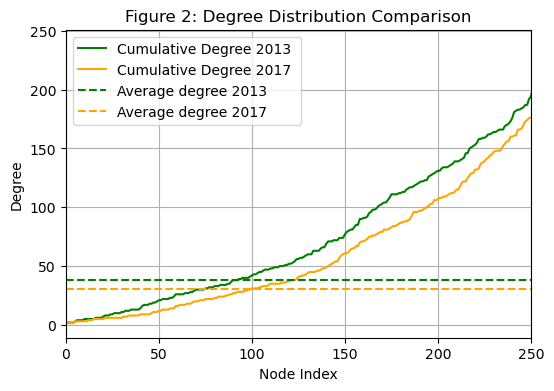

In [115]:
# Plotting the cumulative degree distribution for the two networks
avg_degree_2013 = G_2013.number_of_edges()/G_2013.number_of_nodes()
avg_degree_2017 = G_2017.number_of_edges()/G_2017.number_of_nodes()
plt.figure(figsize=(6, 4))
plt.plot(sorted(degree_dist_2013), label="Cumulative Degree 2013", color="green")
plt.plot(sorted(degree_dist_2017), label="Cumulative Degree 2017 ", color="orange")
plt.title("Figure 2: Degree Distribution Comparison")
plt.xlabel("Node Index")
plt.ylabel("Degree")
plt.xlim(0, 250)
plt.grid(True)
plt.axhline(y=avg_degree_2013, color='green', linestyle='--', label="Average degree 2013")
plt.axhline(y=avg_degree_2017, color='orange', linestyle='--', label="Average degree 2017")
plt.legend()
plt.show()

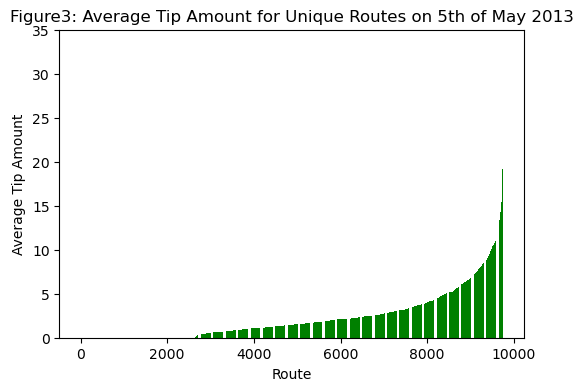

In [116]:
# Here we calculate the average tips for 2013 and plot them
sorted_data = sorted(data[0], key=lambda x: x[1] / x[2])
routes, total_tips, num_trips = zip(*sorted_data)
average_tips = [total_tip / num_trip for total_tip, num_trip in zip(total_tips, num_trips)]

plt.figure(figsize=(6, 4))
plt.bar(range(len(average_tips)), average_tips, align='center', color = "green")
plt.title('Figure3: Average Tip Amount for Unique Routes on 5th of May 2013')
plt.xlabel('Route')
plt.ylabel('Average Tip Amount')
plt.ylim(0, 35)
plt.show()

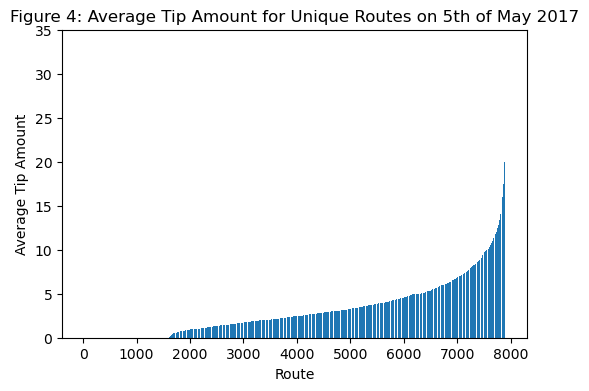

In [117]:
# Here we calculate the average tips for 2017 and plot them
sorted_data = sorted(data[1], key=lambda x: x[1] / x[2])
routes, total_tips, num_trips = zip(*sorted_data)
average_tips = [total_tip / num_trip for total_tip, num_trip in zip(total_tips, num_trips)]

plt.figure(figsize=(6, 4))
plt.bar(range(len(average_tips)), average_tips, align='center')
plt.title('Figure 4: Average Tip Amount for Unique Routes on 5th of May 2017')
plt.xlabel('Route')
plt.ylabel('Average Tip Amount')
plt.ylim(0, 35)
plt.show()

In [44]:
count1 = 0
for i in data[0]:
    if i[1] > 0.0:
        count1 += 1
count2 = 0
for i in data[1]:
    if i[1] > 0.0:
        count2 += 1
print("Fraction of routes with tips in 2013:", count1/9757)
print("Fraction of routes with tips in 2017:", count2/7914)

Fraction of routes with tips in 2013: 0.7296300092241468
Fraction of routes with tips in 2017: 0.7977002779883751


### Weather Data:

In [ ]:
dictionaries = []
def process_data(date): # Method to scrape weather data based on data
    link = "https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/"
    link += date

    #Selenium renders the website
    chrome_prefs = {
        "profile.default_content_settings.cookies": 1  
    }
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_experimental_option("prefs", chrome_prefs)
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(link)
    driver.implicitly_wait(15) # Ensuring everything needed is rendered
    table = driver.find_element(By.XPATH, '//*[@id="inner-content"]/div[2]/div[1]/div[5]/div[1]/div/lib-city-history-observation/div/div[2]/table')
    rows = table.find_elements(By.TAG_NAME, 'tr')
    rows.pop(0)
    weather_data = {}
    attributes = ['Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Precip.', 'Condition'] 
    
    for row in rows:
        if(len(row.text)>3):
            parts = row.text.strip().split(" ")
            
            time = ' '.join(parts[:2])
            details = {
                attributes[0]: parts[2] + ' ' + parts[3],  # Temperature
                attributes[1]: parts[4] + ' ' + parts[5],  # Dew Point
                attributes[2]: parts[6] + ' ' + parts[7],  # Humidity
                attributes[3]: parts[8],                   # Wind
                attributes[4]: parts[9],                   # Wind Speed
                attributes[5]: parts[11],                  # Wind Gust
                attributes[6]: parts[13] + ' ' + parts[14],# Pressure
                attributes[7]: parts[15] + ' ' + parts[16],# Precip.
                attributes[8]: ' '.join(parts[17:]) # Condition
                }
            weather_data[time] = details
    driver.quit()
    dictionaries.append(weather_data)    

In [ ]:
dates = []
for i in range(31):
    day = i+1
    process_data("2013-5-"+str(day)) # We manually change the year, since there are some issues with selenium, e.g. site blocking requests

In [ ]:
#The code below changes the format, so the weather data can more easily be used:
annual_data = {}
for i in range(11):
    year = 2013+i
    count = 0
    annual_data[str(year)] = {}
    for day in dictionaries:
        count += 1
        annual_data[str(year)][str(count)] = day
    year += i

In [ ]:
with open("transformed_data.json", "w") as file: #Saves the weather data, so it is not required to scrape everytime. 
    json.dump(annual_data,file, indent = 4)

In [ ]:
#Loads saved weather_data
with open('transformed_data.json', 'r') as file:
    data = json.load(file)

#This code simply finds the average for a given day
average_per_year = []
for year in data.items():
    average_per_month = []
    for day in year[1].items():
        sum = 0.0
        for time in day[1].items():
            precip = time[1]["Precip."].strip("in").strip(" ")
            sum += float(precip)
        average = float(sum/len(day))
        average_per_month.append(average)
    average_per_year.append(average_per_month)

#This code finds the maximum difference for each day in Precipitation between the years.
max_difference = []
for j in range(len(average_per_year[0])):
    temp_max = 0.0
    max_index = []
    temp_min = 1.0
    min_index = []
    for i in range(len(average_per_year)):
        if (float(average_per_year[i][j]) > temp_max):
            temp_max = average_per_year[i][j]
            max_index = [2013+i,1+j]
        if float(average_per_year[i][j]) < temp_min:
            temp_min = average_per_year[i][j]
            min_index = [2013+i,1+j]
    difference = temp_max-temp_min
    max_difference.append([difference,max_index,min_index])
print(max_difference)

### Wikipedia Text Data:

In [51]:
#Url dictionary holding the wikipedia pages we found based on looking at each borough's page.
urls = {
    "Bronx": ["https://en.wikipedia.org/wiki/The_Bronx","https://en.wikipedia.org/wiki/Co-op_City,_Bronx","https://en.wikipedia.org/wiki/Yankee_Stadium", "https://en.wikipedia.org/wiki/Bronx_Zoo", "https://en.wikipedia.org/wiki/Bronx_Museum_of_the_Arts", "https://en.wikipedia.org/wiki/The_Hub,_Bronx", "https://en.wikipedia.org/wiki/Morris_Heights,_Bronx","https://en.wikipedia.org/wiki/Pelham_Bay_Park","https://en.wikipedia.org/wiki/Van_Cortlandt_Park","https://en.wikipedia.org/wiki/Bronx_Park","https://en.wikipedia.org/wiki/Crotona_Park","https://en.wikipedia.org/wiki/St._Mary%27s_Park_(Bronx)","https://en.wikipedia.org/wiki/St._James_Park_(Bronx)","https://en.wikipedia.org/wiki/Macombs_Dam_Park","https://en.wikipedia.org/wiki/Henry_Hudson_Park","https://en.wikipedia.org/wiki/Ferry_Point_Park","https://en.wikipedia.org/wiki/Soundview_Park_(Bronx)","https://en.wikipedia.org/wiki/Pregones_Theater","https://en.wikipedia.org/wiki/Bronx_Academy_of_Arts_and_Dance","https://en.wikipedia.org/wiki/Fordham_Road","https://en.wikipedia.org/wiki/Bay_Plaza_Shopping_Center"], 
    "Brooklyn": ["https://en.wikipedia.org/wiki/Brooklyn","https://en.wikipedia.org/wiki/Downtown_Brooklyn","https://en.wikipedia.org/wiki/Brooklyn_Bridge","https://en.wikipedia.org/wiki/Coney_Island","https://en.wikipedia.org/wiki/Brooklyn_Museum", "https://en.wikipedia.org/wiki/Brooklyn_Borough_Hall","https://en.wikipedia.org/wiki/Barclays_Center","https://en.wikipedia.org/wiki/Brooklyn_College","https://en.wikipedia.org/wiki/Greenpoint,_Brooklyn","https://en.wikipedia.org/wiki/Sunset_Park,_Brooklyn","https://en.wikipedia.org/wiki/Eighth_Avenue_(Brooklyn)#Chinatown","https://en.wikipedia.org/wiki/Brooklyn_Botanic_Garden","https://en.wikipedia.org/wiki/Grand_Army_Plaza","https://en.wikipedia.org/wiki/The_Brooklyn_Tower","https://en.wikipedia.org/wiki/Floyd_Bennett_Field","https://en.wikipedia.org/wiki/New_York_Transit_Museum","https://en.wikipedia.org/wiki/Prospect_Park_(Brooklyn)","https://en.wikipedia.org/wiki/Prospect_Park_Zoo","https://en.wikipedia.org/wiki/Fort_Greene_Park"],
    "Manhattan":["https://en.wikipedia.org/wiki/Manhattan", "https://en.wikipedia.org/wiki/American_Museum_of_Natural_History", "https://en.wikipedia.org/wiki/The_Battery_(Manhattan)", "https://en.wikipedia.org/wiki/Broadway_(Manhattan)", "https://en.wikipedia.org/wiki/Theater_District,_Manhattan", "https://en.wikipedia.org/wiki/Bryant_Park", "https://en.wikipedia.org/wiki/Central_Park", "https://en.wikipedia.org/wiki/Chinatown,_Manhattan", "https://en.wikipedia.org/wiki/Chrysler_Building", "https://en.wikipedia.org/wiki/The_Cloisters", "https://en.wikipedia.org/wiki/Columbia_University", "https://en.wikipedia.org/wiki/Empire_State_Building", "https://en.wikipedia.org/wiki/Flatiron_Building", "https://en.wikipedia.org/wiki/Financial_District,_Manhattan", "https://en.wikipedia.org/wiki/New_York_Stock_Exchange_Building", "https://en.wikipedia.org/wiki/Wall_Street", "https://en.wikipedia.org/wiki/Greenwich_Village", "https://en.wikipedia.org/wiki/New_York_University","https://en.wikipedia.org/wiki/Harlem", "https://en.wikipedia.org/wiki/Koreatown,_Manhattan", "https://en.wikipedia.org/wiki/Lincoln_Center", "https://en.wikipedia.org/wiki/Metropolitan_Museum_of_Art", "https://en.wikipedia.org/wiki/Pennsylvania_Station_(New_York_City)", "https://en.wikipedia.org/wiki/National_September_11_Museum", "https://en.wikipedia.org/wiki/World_Trade_Center_(2001%E2%80%93present)", "https://en.wikipedia.org/wiki/Times_Square","https://en.wikipedia.org/wiki/Rockefeller_Center"],
    "Queens": ["https://en.wikipedia.org/wiki/Queens","https://en.wikipedia.org/wiki/Flushing,_Queens","https://en.wikipedia.org/wiki/Elmhurst,_Queens#Chinatown,_Elmhurst_(%E5%94%90%E4%BA%BA%E8%A1%97,_%E8%89%BE%E5%A7%86%E8%B5%AB%E6%96%AF%E7%89%B9)", "https://en.wikipedia.org/wiki/John_F._Kennedy_International_Airport", "https://en.wikipedia.org/wiki/Flushing_Meadows%E2%80%93Corona_Park", "https://en.wikipedia.org/wiki/LaGuardia_Airport", "https://en.wikipedia.org/wiki/Downtown_Flushing", "https://en.wikipedia.org/wiki/St._Albans,_Queens#Addisleigh_Park_subsection","https://en.wikipedia.org/wiki/Long_Island_City", "https://en.wikipedia.org/wiki/Queensboro_Bridge", "https://en.wikipedia.org/wiki/Citi_Field", "https://en.wikipedia.org/wiki/Arthur_Ashe_Stadium", "https://en.wikipedia.org/wiki/Queens_Public_Library", "https://en.wikipedia.org/wiki/St._Michael%27s_Cemetery_(New_York)","https://en.wikipedia.org/wiki/All_Faiths_Cemetery","https://en.wikipedia.org/wiki/Calvary_Cemetery_(Queens)", "https://en.wikipedia.org/wiki/Cypress_Hills_Cemetery", "https://en.wikipedia.org/wiki/Mount_Olivet_Cemetery_(Queens)", "https://en.wikipedia.org/wiki/Mount_Zion_Cemetery_(New_York_City)","https://en.wikipedia.org/wiki/Jackson_Heights,_Queens"],
    "Staten Island":["https://en.wikipedia.org/wiki/Staten_Island","https://en.wikipedia.org/wiki/Verrazzano-Narrows_Bridge","https://en.wikipedia.org/wiki/Staten_Island_Zoo","https://en.wikipedia.org/wiki/Staten_Island_Ferry","https://en.wikipedia.org/wiki/College_of_Staten_Island","https://en.wikipedia.org/wiki/Historic_Richmond_Town","https://en.wikipedia.org/wiki/Staten_Island_Borough_Hall","https://en.wikipedia.org/wiki/Great_Kills_Park", "https://en.wikipedia.org/wiki/Miller_Field_(Staten_Island)","https://en.wikipedia.org/wiki/Fort_Wadsworth", "https://en.wikipedia.org/wiki/Conference_House_Park", "https://en.wikipedia.org/wiki/Willowbrook_Park", "https://en.wikipedia.org/wiki/Empire_Outlets","https://en.wikipedia.org/wiki/St._George_Terminal","https://en.wikipedia.org/wiki/Postcards_(memorial)","https://en.wikipedia.org/wiki/Sailors%27_Snug_Harbor","https://en.wikipedia.org/wiki/SIUH_Community_Park"],
}

# This code scrapes the wikipedia pages for each borough and stores the text in a list
boroughs_info = []
for info in urls.items():
    temp_text=""
    for url in info[1]:
        page = ""
        r = requests.get(url)
        soup = BeautifulSoup(r.content)
        texts = soup.find_all("p")
        for text in texts:
            page += text.text
        temp_text += page
    boroughs_info.append(temp_text)

In [54]:
# Function to clean text using NLTK. This function will be used to clean the text from the Wikipedia pages.
def clean_text(text):
    text = text.lower()
    # Removes punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Here we add some custom words to 'stop words' to remove them from the text
    stop_words.update(["new", "new work", "york city", "york", "bronx", "brooklyn", 
                       "manhattan", "queen", "staten island", "city", "nyc","queens", "staten", "island",])
    # Tokenizing the text
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    # Lemmatizing the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)

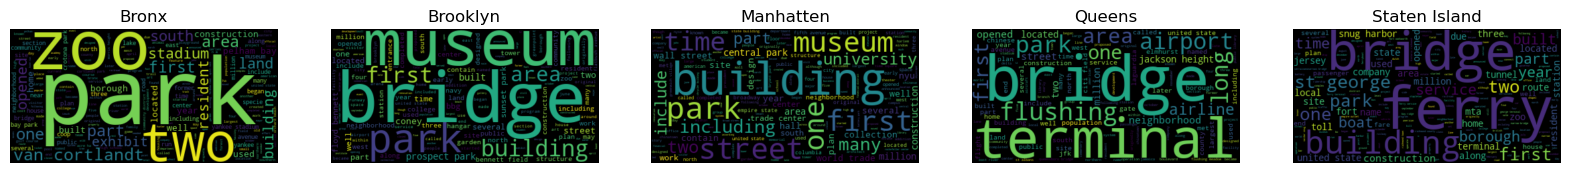

In [55]:
# Creating the wordclouds for each borough based on the text from the Wikipedia pages
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

titles = ['Bronx', 'Brooklyn', 'Manhatten', 'Queens', 'Staten Island']
temp_ = boroughs_info.copy()

for i in range(5):
    temp_[i] = clean_text(temp_[i])
    temp_[i] = temp_[i].split(" ")
    wc = wordcloud.WordCloud().generate(' '.join(temp_[i]))
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis("off")
    axs[i].set_title(titles[i])
plt.show() 

### Further code for analysis

In [ ]:
import community.community_louvain

#Total maximum possibly links:
total_links = ((257+1)*257)/2

#Network density for 2013:
print(9757/total_links)

#Network density for 2017:
print(7914/total_links)

#Check if network is fully connected
is_connected_2013 = nx.is_connected(G_2013)
is_connected_2017 = nx.is_connected(G_2017)
print("Is the network fully connected?", "2013: ", is_connected_2013," 2017: ", is_connected_2017)

#Compute the average shortest weighted path 
print(nx.average_shortest_path_length(G_2013, weight="weight"))
print(nx.average_shortest_path_length(G_2017, weight="weight"))

#Compute the Assortativity Coefficient for the network based on the borough of each node. 
color_assortativity_2013 = nx.attribute_assortativity_coefficient(G_2013, 'group')
print(f"Borough Assortativity Coefficient: {color_assortativity_2013}")

color_assortativity_2017 = nx.attribute_assortativity_coefficient(G_2017, 'group')
print(f"Borough Assortativity Coefficient: {color_assortativity_2017}")

#Compute degree assortativity coefficient
r_2013 = nx.degree_assortativity_coefficient(G_2013)
print(f"Degree Assortativity Coefficient: {r_2013}")

r_2017 = nx.degree_assortativity_coefficient(G_2017)
print(f"Degree Assortativity Coefficient: {r_2017}")

#Louvain-algorithm to find communities
partition_2013 = community.community_louvain.best_partition(G_2013)
partition_2017 = community.community_louvain.best_partition(G_2017)
def show_communities(input_community):
    community_dict = {}
    for node, community in input_community.items():
        if community not in community_dict:
            community_dict[community] = []
        community_dict[community].append(node)

    print("Communities found:")
    for community, nodes in community_dict.items():
        nodes.sort()
        print(len(nodes))
        print(f"Community {community}: Nodes {nodes}") 
show_communities(partition_2013)
show_communities(partition_2017)
modularity_2013 = community.community_louvain.modularity(partition_2013, G_2013)
print(f"The modularity of the found partition is: {modularity_2013}")

modularity_2017 = community.community_louvain.modularity(partition_2017, G_2017)
print(f"The modularity of the found partition is: {modularity_2017}")